In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size = 14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
sns.set(style = 'white')
sns.set(style = 'whitegrid',color_codes = True)

In [2]:
df = pd.read_csv("banking_marketing.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.shape

(4119, 21)

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [8]:
df['target'] = np.where(df['y'].isin(['yes']),1,0)

In [9]:
df['target'].mean()

0.10949259529011895

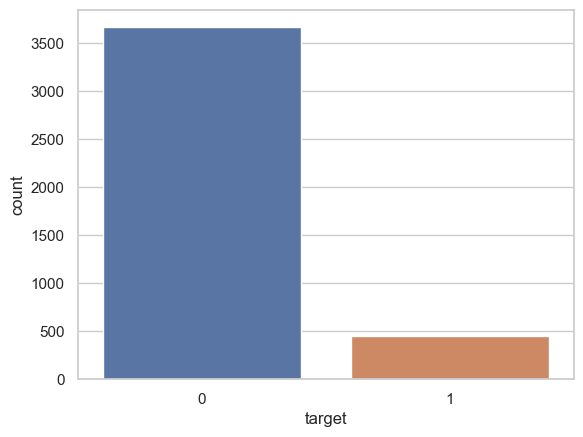

In [10]:
sns.countplot(x = 'target',data = df)
plt.show()

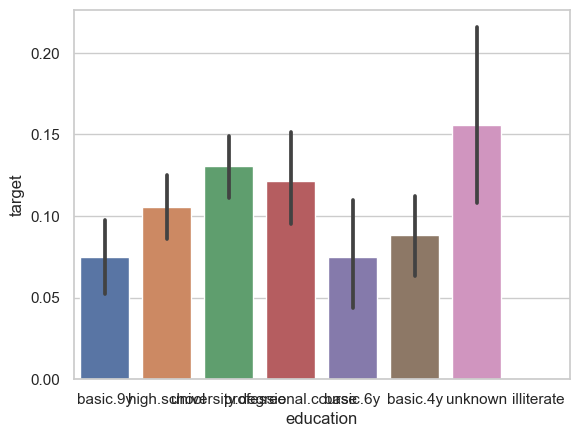

In [11]:
from numpy import mean
ax = sns.barplot(x = 'education',y = 'target',data = df,estimator = mean)

In [12]:
df.groupby('education')['target'].mean()

education
basic.4y               0.088578
basic.6y               0.074561
basic.9y               0.074913
high.school            0.105320
illiterate             0.000000
professional.course    0.121495
university.degree      0.130538
unknown                0.155689
Name: target, dtype: float64

In [13]:
df['education'] = np.where(df['education']=='basic.9y','Basic',df['education'])
df['education'] = np.where(df['education']=='basic.6y','Basic',df['education'])
df['education'] = np.where(df['education']=='basic.4y','Basic',df['education'])
df['education'] = np.where(df['education']=='illiterate','unknow',df['education'])

In [14]:
df.groupby('education')['target'].mean()

education
Basic                  0.079610
high.school            0.105320
professional.course    0.121495
university.degree      0.130538
unknow                 0.000000
unknown                0.155689
Name: target, dtype: float64

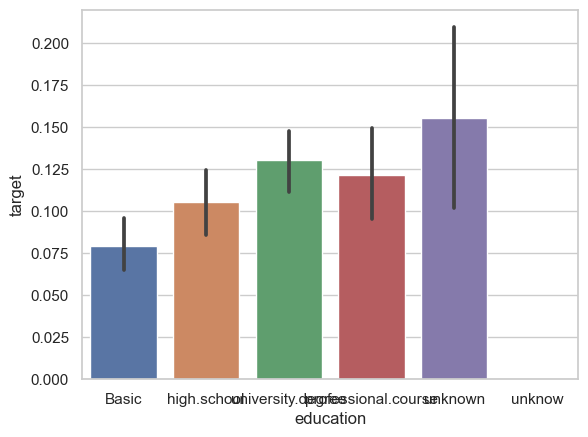

In [15]:
from numpy import mean
ax = sns.barplot(x = 'education',y= 'target',data = df,estimator = mean)

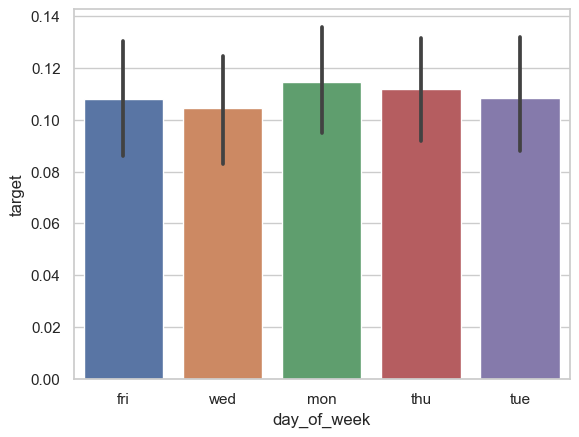

In [16]:
ax =sns.barplot(x = 'day_of_week',y = 'target',data = df,estimator = mean)

In [17]:
df['job'] = np.where(df['job']=='unknown','unemployed',df['job'])

In [18]:
df.groupby('job')['target'].mean()

job
admin.           0.131423
blue-collar      0.069005
entrepreneur     0.054054
housemaid        0.100000
management       0.092593
retired          0.228916
self-employed    0.081761
services         0.089059
student          0.231707
technician       0.115774
unemployed       0.153333
Name: target, dtype: float64

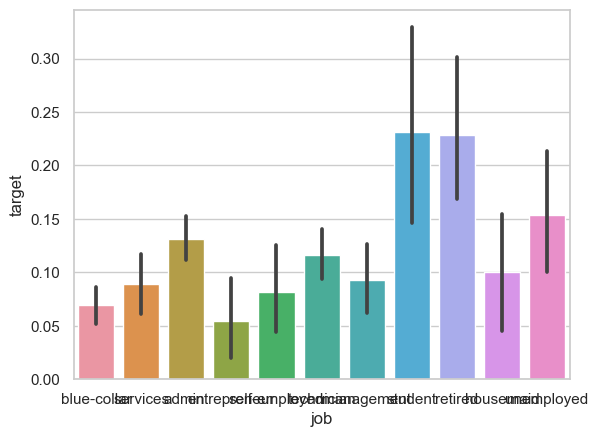

In [19]:
ax =sns.barplot(x = 'job',y = 'target',data = df,estimator = mean)

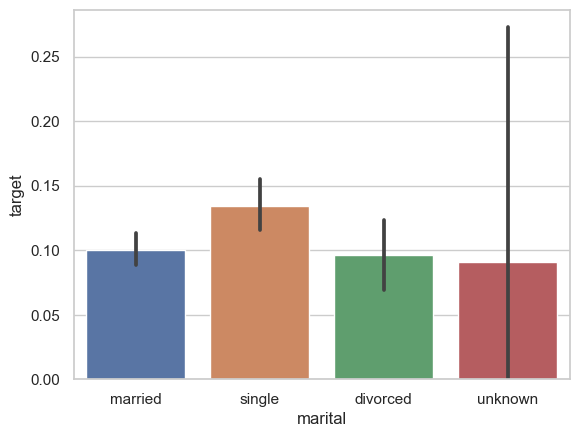

In [20]:
ax =sns.barplot(x = 'marital',y = 'target',data = df,estimator = mean)

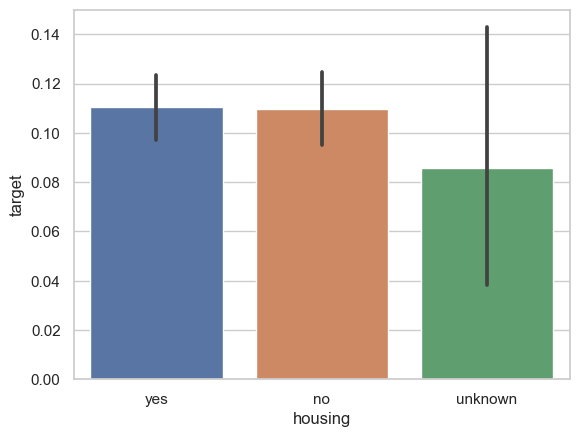

In [21]:
ax =sns.barplot(x = 'housing',y = 'target',data = df,estimator = mean)

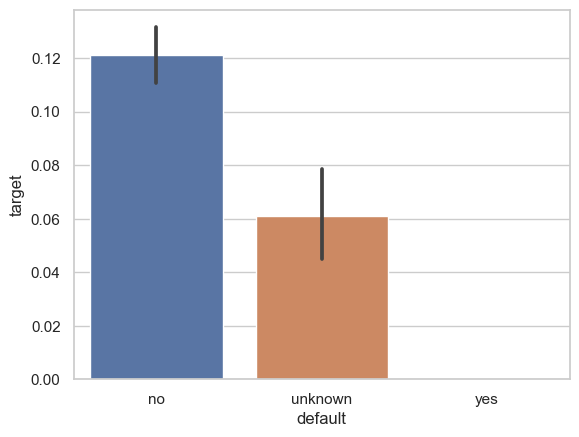

In [22]:
ax =sns.barplot(x = 'default',y = 'target',data = df,estimator = mean)

In [23]:
df['default'] = np.where(df['default']=='unknow','yes',df['job'])

In [24]:
df.groupby('default')['target'].count()

default
admin.           1012
blue-collar       884
entrepreneur      148
housemaid         110
management        324
retired           166
self-employed     159
services          393
student            82
technician        691
unemployed        150
Name: target, dtype: int64

In [25]:
df.groupby('default')['target'].mean()

default
admin.           0.131423
blue-collar      0.069005
entrepreneur     0.054054
housemaid        0.100000
management       0.092593
retired          0.228916
self-employed    0.081761
services         0.089059
student          0.231707
technician       0.115774
unemployed       0.153333
Name: target, dtype: float64

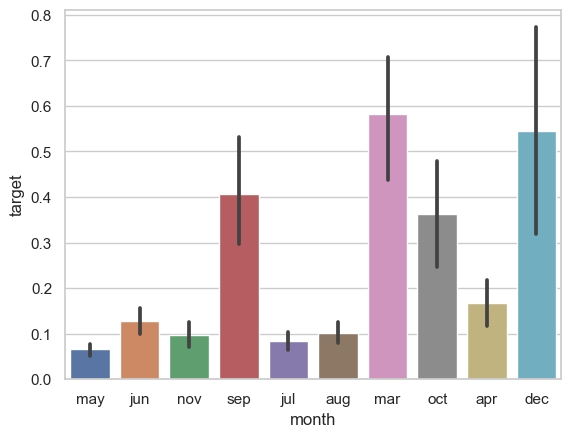

In [26]:
ax =sns.barplot(x = 'month',y = 'target',data = df,estimator = mean)

In [27]:
df['qtr'] = np.where(df['month'].isin(['jan','feb','mar']),'Q1',np.where(df['month'].isin(['apr','may','jun']),'Q2',np.where(df
                                                                                                                             ['month'].isin(['jul','aug','sep']),'Q3',np.where(df['month'].isin(['oct','nov','dec']),'Q4',0))))

In [28]:
df['qtr'].value_counts()

Q2    2123
Q3    1411
Q4     537
Q1      48
Name: qtr, dtype: int64

In [29]:
from numpy import mean

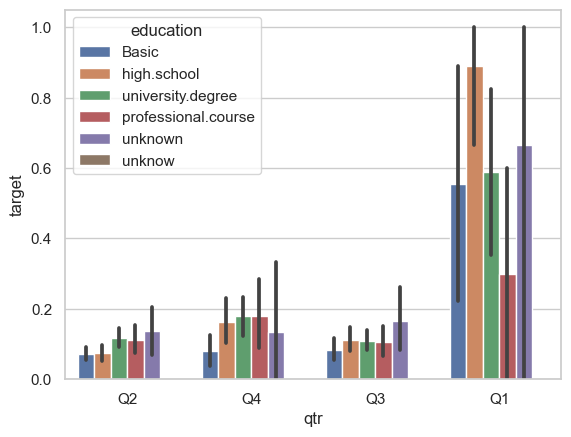

In [30]:
ax = sns.barplot(x = 'qtr',y = 'target',hue ='education' ,data = df,estimator = mean)

In [31]:
df.groupby('qtr')['target'].mean()

qtr
Q1    0.583333
Q2    0.091380
Q3    0.105599
Q4    0.148976
Name: target, dtype: float64

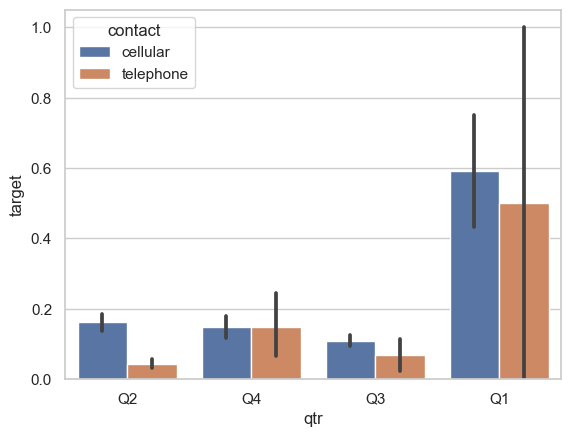

In [32]:
ax = sns.barplot(x = 'qtr',y = 'target',hue ='contact' ,data = df,estimator = mean)

In [33]:
df['age_rank'] = pd.qcut(df['age'].rank(method = 'first').values,5,duplicates = 'drop').codes+1

In [34]:
df.groupby('age_rank')['age'].max()

age_rank
1    31
2    35
3    41
4    50
5    88
Name: age, dtype: int64

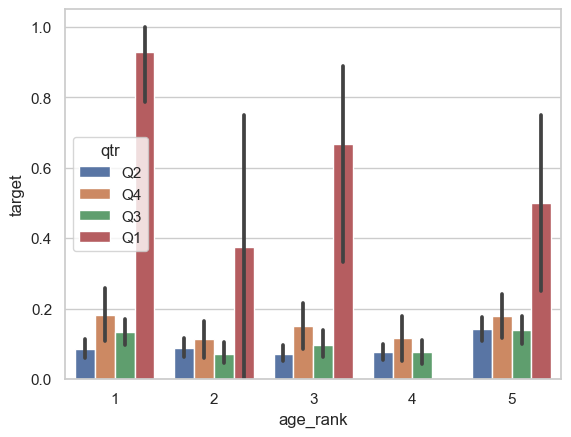

In [35]:
a= sns.barplot(x = 'age_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

In [36]:
df['duration_rank'] = pd.qcut(df['duration'].rank(method = 'first').values,5,duplicates = 'drop').codes+1

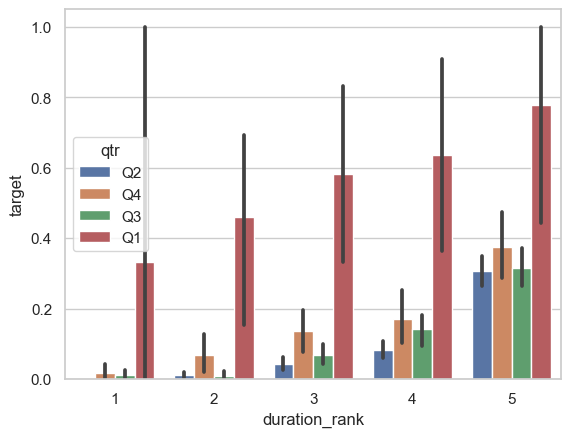

In [37]:
from numpy import mean
ax = sns.barplot(x = 'duration_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

In [38]:
df['pday_rank'] = pd.qcut(df['pdays'].rank(method = 'first').values,5,duplicates = 'drop').codes+1

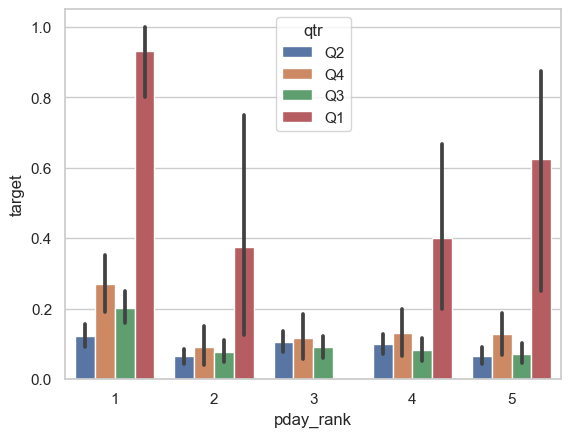

In [39]:
from numpy import mean
ax = sns.barplot(x = 'pday_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

In [40]:
df['previous_rank'] = pd.qcut(df['previous'].rank(method = 'first').values,5,duplicates = 'drop').codes+1

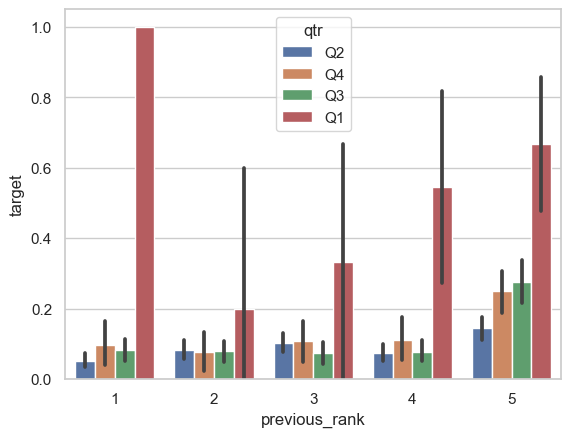

In [41]:
from numpy import mean
ax = sns.barplot(x = 'previous_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

In [42]:
df['poutcome_new'] =np.where(df['poutcome'].isin(['failure','nonexistent']),0,1)
df.groupby('poutcome_new')['target'].mean()

poutcome_new
0    0.090269
1    0.647887
Name: target, dtype: float64

In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'target', 'qtr',
       'age_rank', 'duration_rank', 'pday_rank', 'previous_rank',
       'poutcome_new'],
      dtype='object')

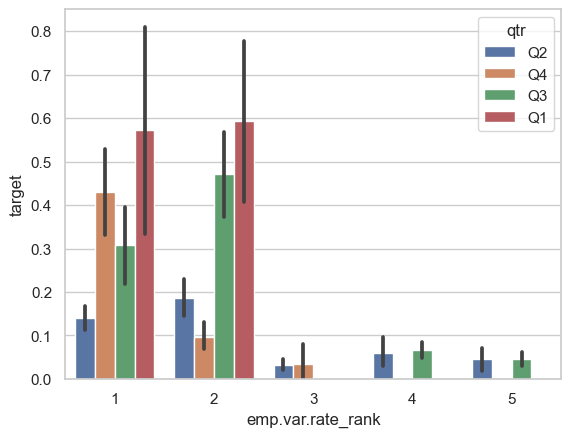

In [44]:
df['emp.var.rate_rank'] = pd.qcut(df['emp.var.rate'].rank(method = 'first').values,5,duplicates = 'drop').codes+1
from numpy import mean
ax = sns.barplot(x = 'emp.var.rate_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

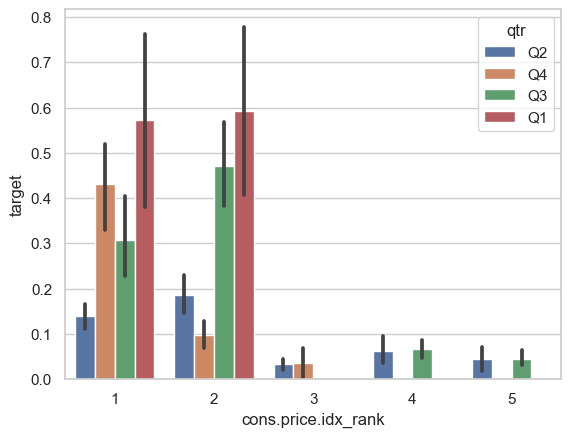

In [45]:
df['cons.price.idx_rank'] = pd.qcut(df['emp.var.rate'].rank(method = 'first').values,5,duplicates = 'drop').codes+1
from numpy import mean
ax = sns.barplot(x = 'cons.price.idx_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

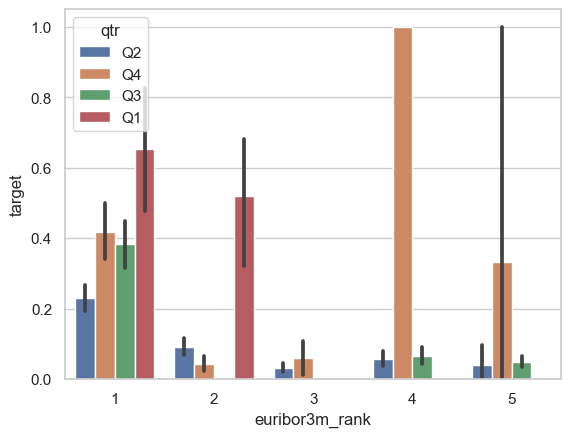

In [46]:
df['euribor3m_rank'] = pd.qcut(df['euribor3m'].rank(method = 'first').values,5,duplicates = 'drop').codes+1
from numpy import mean
ax = sns.barplot(x = 'euribor3m_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

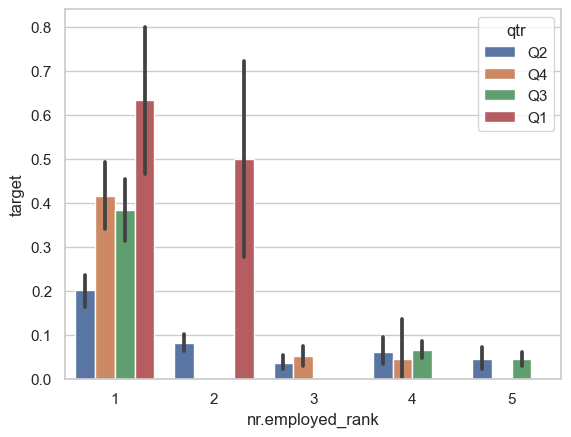

In [47]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method = 'first').values,5,duplicates = 'drop').codes+1
from numpy import mean
ax = sns.barplot(x = 'nr.employed_rank',y = 'target',hue = 'qtr',data = df,estimator = mean)

In [48]:
col_num = ['campaign', 'pdays','previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']
col_char = ['qtr','education','job','contact']

In [49]:
x_char_dum = pd.get_dummies(df[col_char],drop_first = True)

In [50]:
x_all = pd.concat([df[col_num],x_char_dum],axis = 1,join = 'inner')

In [51]:
x_var = x_all
y_var  = df['target']

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_var,y_var,test_size = 0.3,random_state = 0)

In [54]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\DELL\python3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
dtree = DecisionTreeClassifier(criterion  = 'gini',random_state = 100,max_depth = 7,min_samples_leaf = 5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [56]:
rf_1000 = RandomForestClassifier(n_estimators = 200,random_state = 2,
                                max_features = 'auto',
                                max_depth = 2)
rf_1000.fit(x_train,y_train)
rf_1000_score_train = rf_1000.score(x_train,y_train)
print('learning score : ',rf_1000_score_train)

C:\Users\DELL\python3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


learning score :  0.8879639264654874


In [57]:
rf_1000_score_test = rf_1000.score(x_test,y_test)
print('testing score :',rf_1000_score_test)

testing score : 0.9021035598705501


In [58]:
y_pred = logreg.predict(x_test)

In [59]:
print('accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(x_test,y_test)))

accuracy of logistic regression on test set: 0.90


In [60]:
y_pred_tree = dtree.predict(x_test)
print('accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(x_test,y_test)))

accuracy of decision tree classifier on test set: 0.89


In [61]:
y_pred_tree_RF = rf_1000.predict(x_test)
print('accuracy of random forest on test set: {:.2f}'.format(rf_1000.score(x_test,y_test)))

accuracy of random forest on test set: 0.90


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrics = confusion_matrix(y_test,y_pred)
print(confusion_matrics)

[[1095   19]
 [ 102   20]]


In [63]:
from sklearn.metrics import classification_report
classification_report  = classification_report(y_test,y_pred_tree)
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1114
           1       0.44      0.22      0.29       122

    accuracy                           0.89      1236
   macro avg       0.68      0.59      0.62      1236
weighted avg       0.87      0.89      0.88      1236



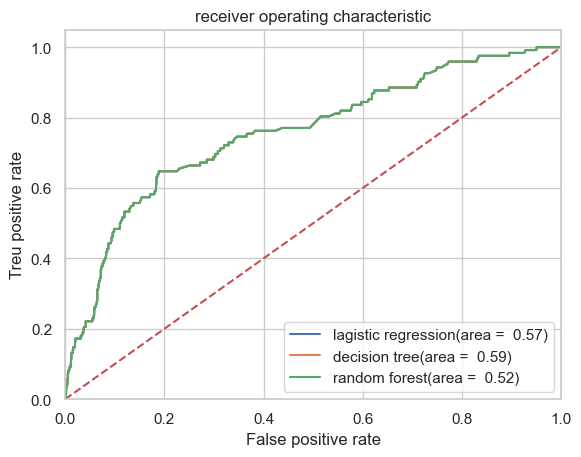

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,logreg.predict(x_test))
tree_roc_auc = roc_auc_score(y_test,dtree.predict(x_test))
RF_roc_auc = roc_auc_score(y_test,rf_1000.predict(x_test))

fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
fpr,tpr,threshold = roc_curve(y_test,dtree.predict_proba(x_test)[:,1])
fpr,tpr,threshold = roc_curve(y_test,rf_1000.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'lagistic regression(area = % 0.2f)' % logit_roc_auc)
plt.plot(fpr,tpr,label = 'decision tree(area = % 0.2f)' % tree_roc_auc)
plt.plot(fpr,tpr,label = 'random forest(area = % 0.2f)' % RF_roc_auc)

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('Treu positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('loc_roc')
plt.show()

In [65]:
y_pred_prob = logreg.predict_proba(x_var)[:,1]
df['y_pred_p'] = pd.DataFrame(y_pred_prob)
df['p_rank'] = pd.qcut(df['y_pred_p'].rank(method = 'first').values,10,duplicates = 'drop').codes+1
df.groupby('p_rank')['target'].mean()

p_rank
1     0.046117
2     0.033981
3     0.053398
4     0.046117
5     0.038835
6     0.070560
7     0.058252
8     0.082524
9     0.206311
10    0.458738
Name: target, dtype: float64

In [66]:
y_pred_prob_dtree = dtree.predict_proba(x_var)[:,1]
df['y_pred_p_dtree'] = pd.DataFrame(y_pred_prob)
df['p_rank_dtree'] = pd.qcut(df['y_pred_p_dtree'].rank(method = 'first').values,10,duplicates = 'drop').codes+1
df.groupby('p_rank_dtree')['target'].mean()

p_rank_dtree
1     0.046117
2     0.033981
3     0.053398
4     0.046117
5     0.038835
6     0.070560
7     0.058252
8     0.082524
9     0.206311
10    0.458738
Name: target, dtype: float64

In [67]:
df.groupby('p_rank')['target'].sum()

p_rank
1      19
2      14
3      22
4      19
5      16
6      29
7      24
8      34
9      85
10    189
Name: target, dtype: int32

In [68]:
df.groupby('p_rank_dtree')['target'].sum()

p_rank_dtree
1      19
2      14
3      22
4      19
5      16
6      29
7      24
8      34
9      85
10    189
Name: target, dtype: int32

In [69]:
df.to_csv('telemarketing_model_scored_file.csv')